# Desafío Técnico - Mercado Libre

#### Ezequiel Panzarasa

# Análisis exploratorio de datos

## Armado de Dataset
Después de explorar un poco la API pública de Mercado Libre, se decidió optar por el armado de un dataset de 10.000 registros. Siendo que la API tiene un offset máximo de 1000, se decidió tomar las 10 categorías más populares (de acuerdo a la página principal de MercadoLibre. Ver imagen adjunta) y armar el dataset con 1.000 registros de cada categoría. <br>
Se eligieron estas 10 categorías siguiendo la hipótesis de que a mayor popularidad se tiene un mayor número de ventas, y más representativa resulta la información obtenida en la muestra para cada una de las publicaciones. 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option("display.max_columns", 103)

##### Ver armado de dataset en MLC_03_RAW_DATASET.ipynb

In [2]:
raw_dataset_df = pd.read_csv("raw_dataset.csv", header=0, index_col=0, sep='|')
raw_dataset_df

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,thumbnail,thumbnail_id,accepts_mercadopago,attributes,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,catalog_listing,order_backend,seller.id,seller.permalink,seller.registration_date,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.eshop_locations,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.seller,seller.eshop.eshop_experience,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.claims.period,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.level_id,prices.id,prices.prices,prices.presentation.display_currency,prices.payment_method_prices,installments.quantity,installments.amount,installments.rate,installments.currency_id,address.state_id,address.state_name,address.city_id,address.city_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller_address.id,seller_address.comment,seller_address.address_line,seller_address.zip_code,seller_address.country.id,seller_address.country.name,seller_address.state.id,seller_address.state.name,seller_address.city.id,seller_address.city.name,seller_address.latitude,seller_address.longitude,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id,seller.car_dealer_logo
0,MLA900810750,MLA,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,NaN,ARS,83,3179,buy_it_now,gold_special,2040-12-07T04:00:00.000Z,new,https://www.mercadolibre.com.ar/repetidor-tp-l...,http://http2.mlstatic.com/D_668117-MLA31786420...,668117-MLA31786420833_082019,True,"[{'value_name': 'wa850re', 'values': [{'id': N...",NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",True,1,25679280,http://perfil.mercadolibre.com.ar/MIPCSTORE,2010-03-25T13:17:41.000-04:00,False,False,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,NaN,87206.0,[],MLA,http://resources.mlstatic.com/eshops/25679280.jpg,2.0,25679280.0,0.0,48927.0,2654.0,historic,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,60 days,0.0001,2.0,60 days,60 days,10628.0,0.0083,93.0,60 days,5_green,MLA900810750,"[{'id': '32', 'type': 'standard', 'conditions'...",ARS,[],12,291.42,70.17,ARS,AR-C,Capital Federal,NaN,Congreso,False,me2,[],cross_docking,False,NaN,NaN,NaN,NaN,AR,Argentina,AR-C,Capital Federal,NaN,Congreso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Analisis preliminar. 
##### Se eliminan todas las columnas que no aporten información. 
##### Ver análisis preliminar en MLC_04_ANALISIS_PRELIMINAR.ipynb

### Limpieza preliminar del Dataset
#### Teniendo en cuenta el resultado del análisis preliminar se decide eliminar los campos que no aporten información. 
##### (Campos que sean todos NULL, o que contengan todos el mismo valor. )

In [3]:
to_drop_list = ["site_id", "sale_price", "currency_id", "buying_mode", "condition", "permalink",
               "thumbnail_id", "thumbnail", "accepts_mercadopago", "catalog_listing", "order_backend",
               "seller.permalink", "seller.car_dealer", "seller.real_estate_agency",
               "seller.eshop.eshop_rubro", "seller.eshop.eshop_id", "seller.eshop.eshop_locations", 
               "seller.eshop.site_id", "seller.eshop.eshop_logo_url", "seller.eshop.seller", "seller.eshop.eshop_experience",
               "seller.seller_reputation.transactions.period", "seller.seller_reputation.metrics.claims.period", "seller.seller_reputation.metrics.delayed_handling_time.period",
               "seller.seller_reputation.metrics.delayed_handling_time.period", "seller.seller_reputation.metrics.cancellations.period", "seller.seller_reputation.level_id", 
               "prices.presentation.display_currency", "prices.payment_method_prices", "installments.currency_id", "address.state_id", "address.city_id", 
               "shipping.mode", "shipping.store_pick_up", "seller_address.id", "seller_address.address_line", "seller_address.comment",
               "seller_address.zip_code", "seller_address.country.id", "seller_address.country.name", "seller_address.state.id",
               "seller_address.state.name", "seller_address.city.id", "seller_address.city.name", "seller_address.latitude",
               "seller_address.longitude", "seller_address.longitude", "seller.seller_reputation.metrics.sales.period",
               "attributes", "prices.prices", "shipping.tags"]

# La mayoría de las columnas se agregaron a esta lista por no tener información relevante. 
# Algunas se agregaron por tener información repetida (seller.address.*). 
# "attributes", "prices.prices", "shipping.tags" se agregaron arbitrariamente.

In [4]:
raw_dataset_df.drop(axis=1, labels=to_drop_list, inplace=True)

In [5]:
raw_dataset_df

,id,title,price,available_quantity,sold_quantity,listing_type_id,stop_time,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,seller.id,seller.registration_date,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_status_id,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,prices.id,installments.quantity,installments.amount,installments.rate,address.state_name,address.city_name,shipping.free_shipping,shipping.logistic_type,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id,seller.car_dealer_logo
0,MLA900810750,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,83,3179,gold_special,2040-12-07T04:00:00.000Z,NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",25679280,2010-03-25T13:17:41.000-04:00,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,2.0,48927.0,2654.0,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,0.0001,2.0,10628.0,0.0083,93.0,MLA900810750,12,291.42,70.17,Capital Federal,Congreso,False,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLA856313404,Disco Sólido Interno Kingston Sa400s37/240g 240gb,3688.00,40,5858,gold_special,2040-05-13T04:00:00.000Z,NaN,MLA1672,NaN,MLA-HARD_DRIVES_AND_SSDS,MLA6408981,"['brand_verified', 'good_quality_picture', 'go...",215299808,2016-05-26T16:28:35.000-04:00,"['normal', 'user_info_verified', 'mshops', 'de...",NaN,NaN,132235.0,6683.0,0.03,0.95,0.02,125552.0,platinum,0.0125,264.0,0.1341,2703.0,20135.0,0.0074,157.0,MLA856313404,12,522.99,70.17,Capital Federal,Núñez,True,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MLA618887655,Pc Armada Cpu Amd Full Gamer A10-9700 16gb Ddr...,53999.00,250,500,gold_pro,2037-08-24T02:40:31.000Z,74999.0,MLA1649,NaN,MLA-DESKTOP_COMPUTERS,NaN,"['ahora-12', 'brand_verified', 'extended_warra...",1534239,2006-11-06T12:57:16.000-04:00,"['normal', 'user_info_verified', 'eshop', 'msh...",4KRC,2.0,22407.0,2065.0,0.02,0.95,0.03,20342.0,platinum,0.0080,43.0,0.0000,0.0,5041.0,0.0088,47.0,MLA618887655,18,2999.94,0.00,Capital Federal,Palermo,True,cross_docking,0.001,5.0,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLA855055612,Notebook Exo Smart E19 Intel Celeron Ram4gb Ss...,39999.00,500,5000,gold_pro,2040-05-07T04:00:00.000Z,46799.0,MLA1652,341.0,MLA-NOTEBOOKS,MLA16368693,"['good_quality_thumbnail', 'ahora-12', 'brand_...",180214913,2015-03-30T11:39:13.000-04:00,"['brand', 'user_info_verified', 'large_seller'...",NaN,NaN,26668.0,2025.0,0.04,0.94,0.02,24643.0,platinum,0.0045,9.0,0.0000,0.0,1872.0,0.0000,0.0,MLA855055612,18,2222.17,0.00,Capital Federal,Parque Patricios,True,fulfillment,NaN,NaN,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLA841426834,Pasta Térmica Arctic Mx-4 4grs. Alto Rendimien...,1600.00,500,500,gold_sp

##### Se redujo el dataset de 102 columnas, a 53 (que pueden o no tener información útil)

# Análisis específico de Items con descuento

#### Armado del dataset

In [6]:
discount_df = raw_dataset_df[raw_dataset_df["original_price"].notnull()]

len_disc_df = len(discount_df)
len_raw_df = len(raw_dataset_df)

print("Número total de ítems con descuento en la muestra:", len_disc_df)
print("Porcentaje de ítems con descuento en la muestra: {} %".format(round((len_disc_df / len_raw_df) * 100, 2)))

Número total de ítems con descuento en la muestra: 2118
Porcentaje de ítems con descuento en la muestra: 20.2 %


### ¿Cuántos productos con descuento hay en cada categoría?

In [7]:
discount_df.groupby("category_id").count().sort_values(by=["id"], ascending=False)['id']

category_id
MLA1652      87
MLA6143      60
MLA5411      54
MLA109027    52
MLA1055      51
             ..
MLA411829     1
MLA411151     1
MLA411071     1
MLA411069     1
MLA9913       1
Name: id, Length: 509, dtype: int64

##### A pesar de que se armó el dataset crudo apuntando a tener 10 categorías, la variable category_id parece tener mayor granularidad.

In [8]:
# Ejemplos para mostrar la granularidad. 
print(discount_df[discount_df["category_id"] == "MLA1652"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA6143"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA5411"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA109027"].groupby("domain_id").count()['id'], "\n")

domain_id
MLA-NOTEBOOKS    87
Name: id, dtype: int64 

domain_id
MLA-BICYCLES    60
Name: id, dtype: int64 

domain_id
MLA-HAIR_CLIPPERS    54
Name: id, dtype: int64 

domain_id
MLA-SNEAKERS    52
Name: id, dtype: int64 



##### Se concluye entonces, que el campo domain_id es un "user friendly" alias para el campo category_id

### Entonces, la pregunta cambia a: ¿Cuáles son las categorías que ofrecen más productos con descuento?

In [9]:
# Se seleccionan arbitrariamente las 25 categorías que más descuentos ofrecen
discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25]

domain_id
MLA-NOTEBOOKS                              87
MLA-HEADPHONES                             74
MLA-HAIR_CLIPPERS                          65
MLA-SNEAKERS                               60
MLA-BICYCLES                               60
MLA-TOYS_AND_GAMES                         53
MLA-CELLPHONES                             51
MLA-BOARD_GAMES                            49
MLA-SPEAKERS                               43
MLA-VIDEO_GAMES                            43
MLA-DESKTOP_COMPUTERS                      42
MLA-FANS                                   40
MLA-TV_AND_MONITOR_MOUNTS                  39
MLA-ACTION_FIGURES                         38
MLA-SUPPLEMENTS                            30
MLA-GAME_CONSOLES                          30
MLA-TELEVISIONS                            27
MLA-T_SHIRTS                               24
MLA-DOLLS                                  22
MLA-PANTS                                  21
MLA-SMARTWATCHES                           19
MLA-HAIR_DRYERS         

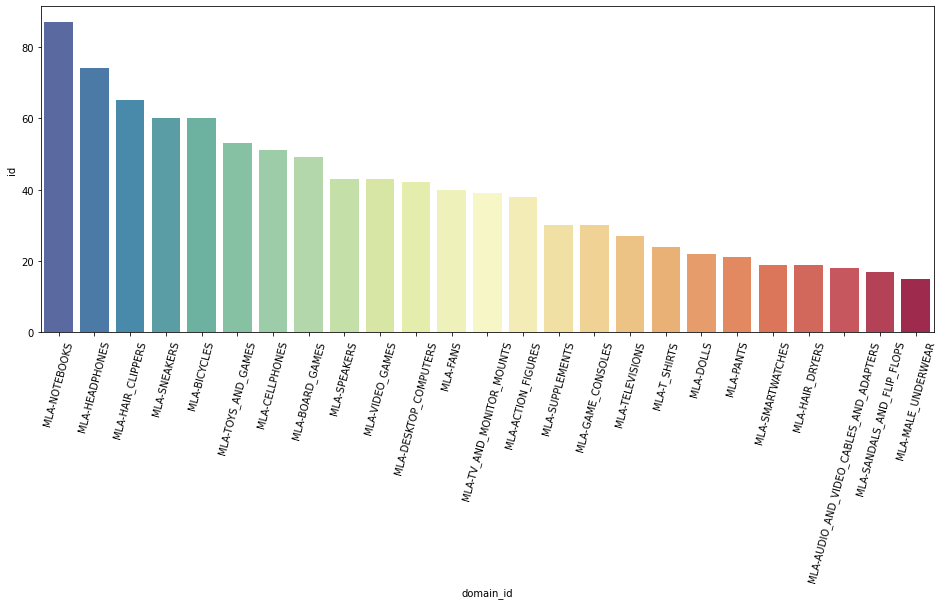

In [12]:
top_categories_df = discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25].reset_index()

# Se elige la columna id arbitrariamente. Esta columna cuenta cantidad de publicaciones.
plt.figure(figsize=(16, 6))

bar_plot = sns.barplot(data=top_categories_df, x="domain_id", y="id", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

##### Estos son los valores absolutos para la muestra de ítems con descuento. Entonces, puede seguir la pregunta:
### ¿Estas categorías ofrecen más ítems con descuento porque tienen más ítems en esta categoría, o porque la categoría ofrece más descuentos?
##### Básicamente, lo que se está preguntando es si la distribución de descuentos en la muestra es uniforme o no. 
##### Para responder esta pregunta, vamos a df crudo original. 

In [13]:
# Se toman los mismos 25 domain_ids
top_categories_raw_df = raw_dataset_df[raw_dataset_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]
# Se agrupa y se cuenta por categoría
top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"]

domain_id
MLA-CELLPHONES                             439
MLA-GAME_CONSOLES                          338
MLA-VIDEO_GAMES                            327
MLA-SNEAKERS                               295
MLA-HEADPHONES                             291
MLA-DESKTOP_COMPUTERS                      230
MLA-NOTEBOOKS                              226
MLA-BOARD_GAMES                            178
MLA-SUPPLEMENTS                            168
MLA-T_SHIRTS                               165
MLA-ACTION_FIGURES                         157
MLA-BICYCLES                               156
MLA-HAIR_CLIPPERS                          151
MLA-TELEVISIONS                            145
MLA-PANTS                                  140
MLA-TOYS_AND_GAMES                         122
MLA-FANS                                   108
MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    101
MLA-SMARTWATCHES                            98
MLA-SPEAKERS                                83
MLA-TV_AND_MONITOR_MOUNTS                   82
MLA

##### Hago un join del raw df con el discount df y luego calculo los porcentajes de descuentos ofrecidos en relación al total de publicaciones en esa categoría. 

In [14]:
top_categories_raw_df = top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"].reset_index()

# Primero renombro las columnas
top_categories_raw_df.columns = ["domain_id", "raw_count"]
top_categories_df.columns = ["domain_id", "discount_count"]

# merge dfs
top_categories_merge_df = top_categories_df.merge(top_categories_raw_df, on=["domain_id"], how="outer")

# Calculo porcentajes
top_categories_merge_df["disc_raw_%"] = top_categories_merge_df.apply(lambda row: round((row["discount_count"] / row["raw_count"]) * 100, 2), axis=1)

In [15]:
top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False)

,domain_id,discount_count,raw_count,disc_raw_%
8,MLA-SPEAKERS,43,83,51.81
12,MLA-TV_AND_MONITOR_MOUNTS,39,82,47.56
21,MLA-HAIR_DRYERS,19,43,44.19
5,MLA-TOYS_AND_GAMES,53,122,43.44
2,MLA-HAIR_CLIPPERS,65,151,43.05
0,MLA-NOTEBOOKS,87,226,38.50
4,MLA-BICYCLES,60,156,38.46
11,MLA-FANS,40,108,37.04
24,MLA-MALE_UNDERWEAR,15,43,34.88
18,MLA-DOLLS,22,66,33.33


##### Las categorías que menos descuentos ofrecen en relación a la cantidad de publicaciones son: Juegos de Video, Celulares y Consolas
##### Parlantes, Mounts para monitores y secadores de pelo son las que más descuentos presentan

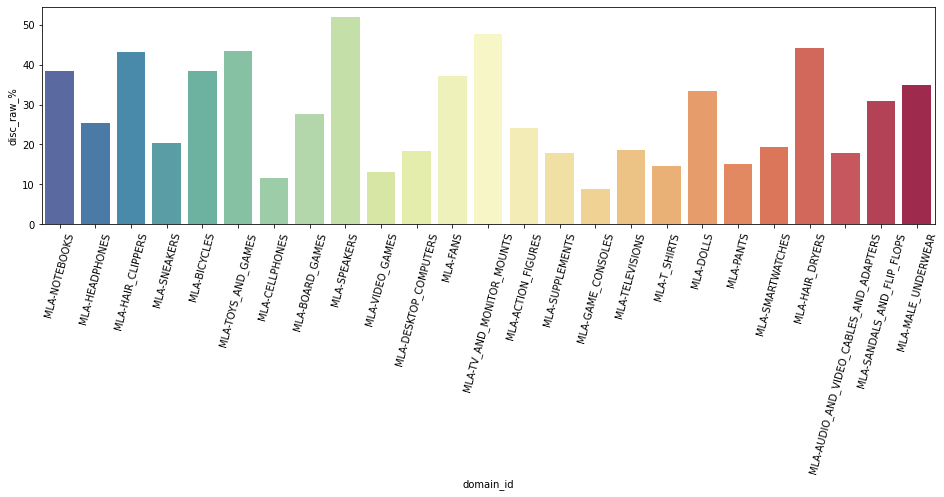

In [16]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="disc_raw_%", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

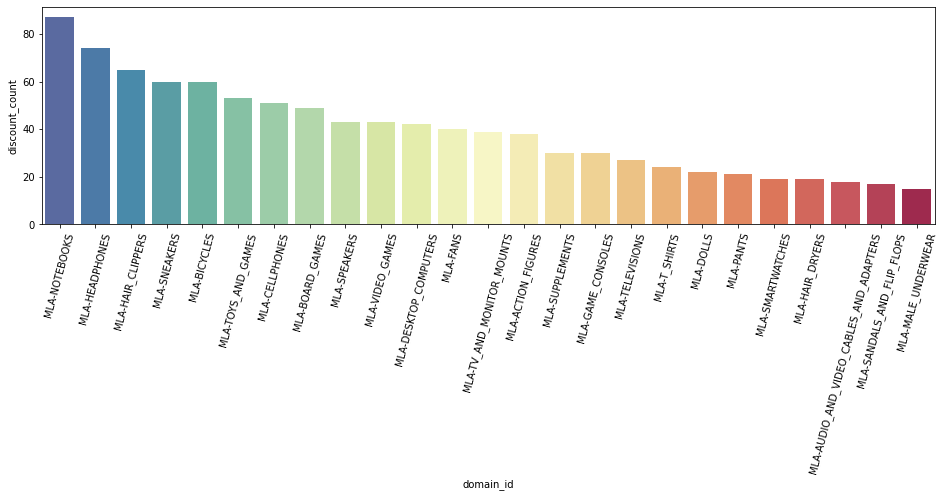

In [17]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="discount_count", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

### Se ve claramente que la distribución de descuentos no es uniforme.
#### Si tomamos, por ejemplo, el caso de los teléfonos celulares, se ve que rankea alto en cantidad de descuentos. Pero cuando vemos el porcentaje de descuentos en celulares en relación a la cantidad de publicaciones en esta categoría, vemos que está en el anteúltimo puesto. 
##### Se podría resumir en: "Hay muchas publicaciones de celulares en el df de descuentos porque hay muchas publicaciones de celulares, no porque haya muchas publicaciones con descuento en la categoría de celulares"

## Hasta acá se tienen las categorías que más publicaciones con descuento ofrecen. ¿Pero son estas categorías las que ofrecen mayores descuentos?

In [18]:
# Busco en el  discount df de las 25 categorías con más publicaciones
price_discount_df = discount_df[discount_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]
price_discount_df = price_discount_df[["id", "domain_id", "price", "original_price"]]

#### Arbitrariamente se decide continuar trabajando con las 25 categorías con más publicaciones con descuento. Esto es, por un lado, para comparar con los resultados obtenidos anteriormente, y por otro lado, para evitar calcular promedios no representativos en categorías que tengan una o dos publicaciones. La categoría con más publicaciones (notebooks) tiene 6 veces más muestras que la categoría con menos publicaciones (male_underwear). Sin embargo, los números están dentro del orden, por lo que se considerará aceptable su comparación. 